<a href="https://colab.research.google.com/github/SeeUSoon93/deepLearning/blob/main/mediaPipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.6/33.6 MB 36.9 MB/s eta 0:00:00


In [2]:
!pip install opencv-python

In [4]:
# 필요한 라이브러리를 가져옵니다.
import cv2
import mediapipe as mp

# 미디어 파이프에서 제공하는 드로잉 유틸리티와 손 모델을 사용하기 위한 인스턴스를 생성합니다.
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

# 웹캠을 사용하기 위해 cv2.VideoCapture 객체를 초기화합니다.
cap = cv2.VideoCapture(1)

# 손을 감지하기 위한 설정으로 'Hands' 객체를 생성합니다.
with mp_hands.Hands(
    max_num_hands=1,  # 최대 감지할 손의 개수
    min_detection_confidence=0.5,  # 감지를 위한 최소 신뢰도
    min_tracking_confidence=0.5) as hands:  # 추적을 위한 최소 신뢰도

    # 웹캠이 열려 있는 동안 무한 루프를 돌면서 프레임을 읽습니다.
    while cap.isOpened():
        success, image = cap.read()
        if not success:
            continue  # 읽기에 실패하면 다음 프레임으로 건너뜁니다.

        # 이미지를 좌우반전시키고 RGB로 변환합니다. (미디어 파이프가 RGB 이미지를 사용)
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # 변환된 이미지로 손을 감지합니다.
        results = hands.process(image)

        # 다시 BGR로 이미지를 변환하여 OpenCV에서 사용할 수 있게 합니다.
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

        # 감지된 손의 랜드마크가 있으면 정보를 화면에 표시합니다.
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                # 랜드마크 좌표를 가져와서 특정 손가락의 x 좌표를 계산합니다.
                finger1 = int(hand_landmarks.landmark[4].x * 100)
                finger2 = int(hand_landmarks.landmark[8].x * 100)
                # 손가락들 사이의 거리를 계산합니다.
                dist = abs(finger1 - finger2)
                # 계산된 정보를 이미지 위에 텍스트로 표시합니다.
                cv2.putText(
                    image, text='f1=%d f2=%d dist=%d ' % (finger1, finger2, dist), org=(10, 30),
                    fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1,
                    color=(255, 255, 255), thickness=3)

                # 손의 랜드마크와 연결선을 이미지 위에 그립니다.
                mp_drawing.draw_landmarks(
                    image, hand_landmarks, mp_hands.HAND_CONNECTIONS)

        # 처리된 이미지를 'image'라는 창에 표시합니다.
        cv2.imshow('image', image)
        # 'q' 키를 누르면 루프에서 빠져나와 프로그램을 종료합니다.
        if cv2.waitKey(1) == ord('q'):
            break

# 사용이 끝난 후, 웹캠을 해제합니다.
cap.release()

In [5]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np

# JavaScript를 이용하여 웹캠에서 이미지를 캡처하는 함수
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# 이미지를 캡처하고 OpenCV를 이용하여 불러옵니다.
filename = take_photo()
image = cv2.imread(filename)

# 여기에 image 변수를 사용하여 원하는 OpenCV 작업을 수행하세요.
# 예: cv2.imshow() 대신에 이미지를 표시하는 코드


<IPython.core.display.Javascript object>

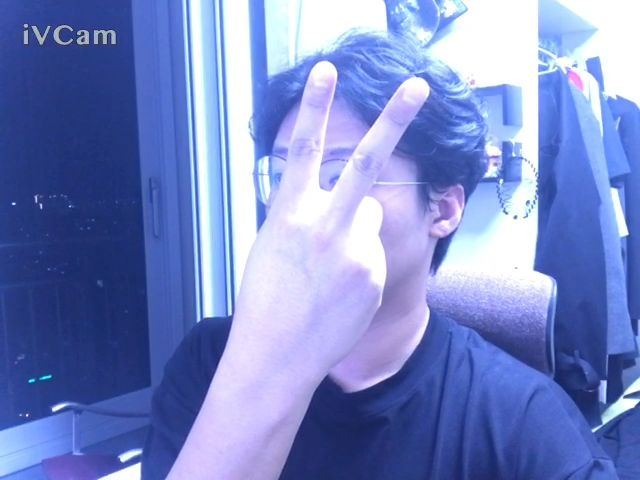

In [9]:
from IPython.display import Image

display(Image(filename))


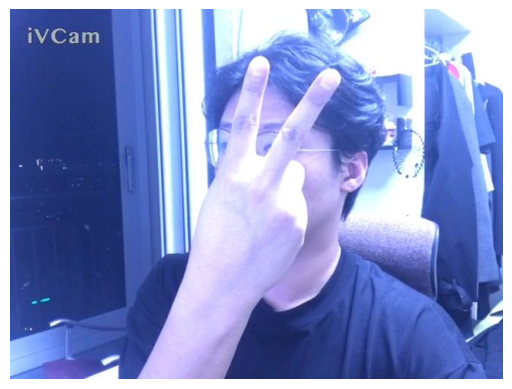

In [10]:
import matplotlib.pyplot as plt

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지를 표시합니다.
plt.imshow(image)
plt.axis('off') # 축을 끕니다.
plt.show()
